In [1]:
pip install pomegranate

In [2]:
pip install pybbn

In [3]:
pip install pgmpy

In [1]:
#  Import Libraries such as Numpy, Panda and Matplotlib 
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pomegranate import *
from pgmpy.estimators import MaximumLikelihoodEstimator

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read Input file from Desktop using File Library of Google collab.
Inp_data = files.upload() 

Saving Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls to Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls


In [3]:
xls = pd.ExcelFile('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls')
trainingData = pd.read_excel(xls, 'Training_Data')
testData = pd.read_excel(xls, 'Test_Data')

trainingData.columns
data = trainingData[['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS']]

In [4]:
Data = data

In [5]:
#Display Header of Data
Data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [6]:
Data.describe

<bound method NDFrame.describe of       STG   SCG   STR   LPR   PEG       UNS
0    0.00  0.00  0.00  0.00  0.00  very_low
1    0.08  0.08  0.10  0.24  0.90      High
2    0.06  0.06  0.05  0.25  0.33       Low
3    0.10  0.10  0.15  0.65  0.30    Middle
4    0.08  0.08  0.08  0.98  0.24       Low
..    ...   ...   ...   ...   ...       ...
253  0.61  0.78  0.69  0.92  0.58      High
254  0.78  0.61  0.71  0.19  0.60    Middle
255  0.54  0.82  0.71  0.29  0.77      High
256  0.50  0.75  0.81  0.61  0.26    Middle
257  0.66  0.90  0.76  0.87  0.74      High

[258 rows x 6 columns]>

In [8]:
mydb=np.array(Data)

In [9]:
bnet = BayesianNetwork.from_samples(mydb)

In [10]:
print(bnet.node_count())

6


In [11]:
print(bnet.probability([[0.09,0.15,0.4,0.1,0.6,'Middle']]))

6.335999999999991e-09


In [12]:
print(bnet.probability([[0, 0, 0.5, 0.2, 0.85, 'very_low']]))

6.240000000000013e-10


In [13]:
print(bnet.probability([[0, 0, 0.5, 0.2, 0.85, 'Low']]))

1.632e-09


In [14]:
print(bnet.probability([[0, 0, 0.5, 0.2, 0.85, 'Middle']]))

1.5840000000000032e-09


In [15]:
print(bnet.probability([[0, 0, 0.5, 0.2, 0.85, 'High']]))

9.600000000000019e-10


In [16]:
print(bnet.probability([[0.8, 0.78, 0, 0.8, 0.9, 'Middle']]))

9.900000000000016e-11


In [17]:
# We have implemented bayesian model using pgpmy library
model = BayesianModel([('STG','SCG'), ('SCG','STR'), ('STR','LPR'), ('LPR', 'PEG'), ('PEG',' UNS')])


In [18]:
model.fit(data)

In [19]:
infer = VariableElimination(model)

In [20]:
# Determine probabity 
q = infer.query(variables=[" UNS"], evidence={"STG":0.09, "SCG":0.15, "STR" : 0.4,"LPR" : 0.1, "PEG":0.6})
print(q)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+---------------+-------------+
|  UNS          |   phi( UNS) |
+===============+=============+
| UNS(High)     |      0.0000 |
+---------------+-------------+
| UNS(Low)      |      0.0000 |
+---------------+-------------+
| UNS(Middle)   |      1.0000 |
+---------------+-------------+
| UNS(very_low) |      0.0000 |
+---------------+-------------+


In [21]:
q = infer.query(variables=[" UNS"], evidence={"STG":0, "SCG":0, "STR" : 0.5,"LPR" : 0.2, "PEG":0.85})
print(q)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+---------------+-------------+
|  UNS          |   phi( UNS) |
+===============+=============+
| UNS(High)     |      1.0000 |
+---------------+-------------+
| UNS(Low)      |      0.0000 |
+---------------+-------------+
| UNS(Middle)   |      0.0000 |
+---------------+-------------+
| UNS(very_low) |      0.0000 |
+---------------+-------------+


In [22]:
q = infer.query(variables=[" UNS"], evidence={"STG":0.8, "SCG":0, "STR" : 0.8, "LPR" : 0.9, "PEG":0.9})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [23]:
print(q)

+---------------+-------------+
|  UNS          |   phi( UNS) |
+===============+=============+
| UNS(High)     |      1.0000 |
+---------------+-------------+
| UNS(Low)      |      0.0000 |
+---------------+-------------+
| UNS(Middle)   |      0.0000 |
+---------------+-------------+
| UNS(very_low) |      0.0000 |
+---------------+-------------+


**Question 2:**

In [24]:
from sklearn import tree
from sklearn import metrics

In [25]:
clf = tree.DecisionTreeClassifier( max_depth= 5)

In [26]:
X_train = data[{'STG', 'SCG', 'STR', 'LPR', 'PEG'}]

In [27]:
Y_train = data[{' UNS'}]

In [28]:
X_test = testData[{'STG', 'SCG', 'STR', 'LPR', 'PEG'}]

In [29]:
Y_test = testData[{' UNS'}]

In [30]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7310344827586207


In [33]:
cn = ['very_low', 'Low', 'Middle', 'High']

[Text(594.4602272727273, 1038.125, 'X[1] <= 0.337\ngini = 0.712\nsamples = 258\nvalue = [63, 83, 88, 24]\nclass = Middle'),
 Text(290.625, 849.375, 'X[1] <= 0.125\ngini = 0.453\nsamples = 115\nvalue = [0, 81, 10, 24]\nclass = Low'),
 Text(158.52272727272728, 660.625, 'X[3] <= 0.705\ngini = 0.384\nsamples = 27\nvalue = [0, 7, 0, 20]\nclass = High'),
 Text(105.68181818181819, 471.875, 'X[4] <= 0.465\ngini = 0.091\nsamples = 21\nvalue = [0, 1, 0, 20]\nclass = High'),
 Text(52.84090909090909, 283.125, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]\nclass = High'),
 Text(158.52272727272728, 283.125, 'X[1] <= 0.085\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1]\nclass = Low'),
 Text(105.68181818181819, 94.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = High'),
 Text(211.36363636363637, 94.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = Low'),
 Text(211.36363636363637, 471.875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]\nclass = Low'),
 Text(422.72727272727275,

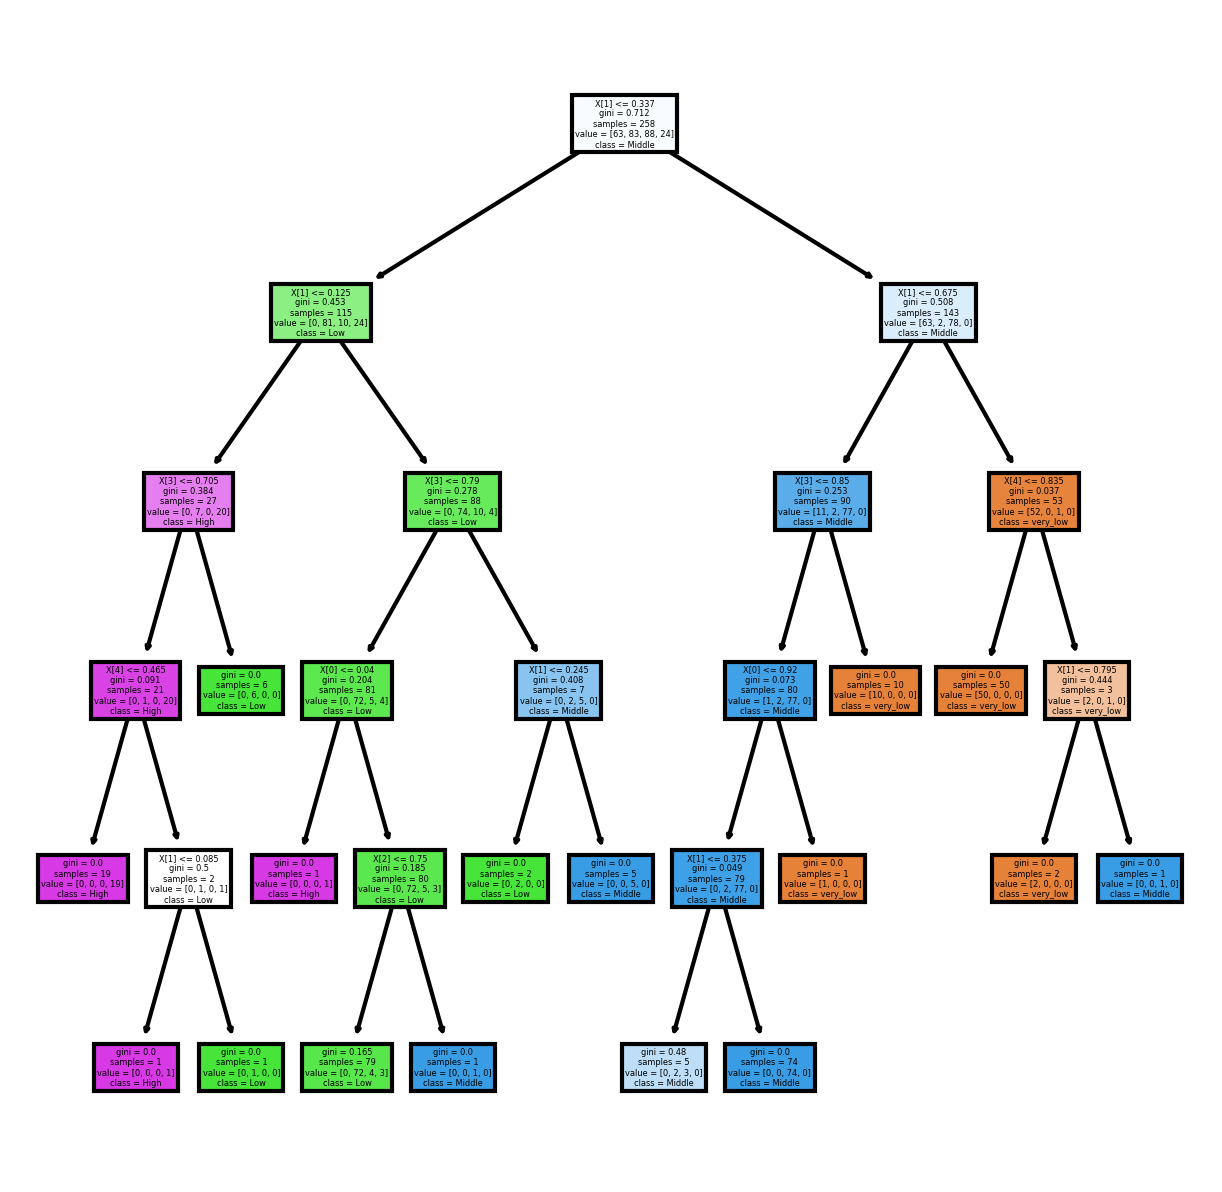

In [34]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf, class_names= cn , filled=True)